In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector, RFE, SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer
from fancyimpute import SoftImpute
import plotly.express as px
from scipy.stats import ttest_rel

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import graphviz
from sklearn.tree import export_graphviz
from sklearn.ensemble import BaggingClassifier

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score



In [2]:

# Read the CSV file (assuming comma-separated)
data = pd.read_csv('C:\\Users\\roryq\\Downloads\\Wines.txt')



data['density_combined'] = 0.6815 * data['fixed acidity'] - 0.4947 * data['alcohol']

data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,density_combined
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0.39292
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0.46764
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,0.46764
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,2.78474
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,0.39292


In [3]:
# Create binary target: high quality = 1 if quality ≥ 7
data['high_quality'] = (data['quality'] >= 7).astype(int)

# Drop unnecessary columns
X = data.drop(columns=['quality', 'high_quality', 'Id', 'density'])  # features
y = data['high_quality'] 

In [4]:

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Split data (already done)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, stratify=y, random_state=42)

# Train XGBoost on original, imbalanced training data
model1 = XGBClassifier(eval_metric='aucpr', use_label_encoder=False)
model1.fit(X_train1, y_train1)


C:\Users\roryq\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:59:49] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [5]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)

# Predict class labels and probabilities
y_pred1 = model1.predict(X_test1)
y_prob1 = model1.predict_proba(X_test1)[:, 1]  # for AUC

In [6]:
# Basic metrics
accuracy  = accuracy_score(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1)
recall    = recall_score(y_test1, y_pred1)
f1        = f1_score(y_test1, y_pred1)
auc       = roc_auc_score(y_test1, y_prob1)

# Print results
print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")
print(f"AUC:       {auc:.3f}")


Accuracy:  0.895
Precision: 0.639
Recall:    0.575
F1 Score:  0.605
AUC:       0.905


In [7]:
# Detailed report
print("\nClassification Report:")
print(classification_report(y_test1, y_pred1))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test1, y_pred1))



Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       246
           1       0.64      0.57      0.61        40

    accuracy                           0.90       286
   macro avg       0.79      0.76      0.77       286
weighted avg       0.89      0.90      0.89       286


Confusion Matrix:
[[233  13]
 [ 17  23]]


In [8]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Split data BEFORE SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Apply SMOTE to training set only
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train XGBoost on balanced data
model = XGBClassifier(eval_metric='aucpr')
model.fit(X_resampled, y_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [9]:
from sklearn.metrics import roc_auc_score

# Predict and evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Classification report
print(classification_report(y_test, y_pred))

# AUC score
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.3f}")


              precision    recall  f1-score   support

           0       0.94      0.91      0.92       246
           1       0.53      0.65      0.58        40

    accuracy                           0.87       286
   macro avg       0.74      0.78      0.75       286
weighted avg       0.88      0.87      0.88       286

AUC: 0.904


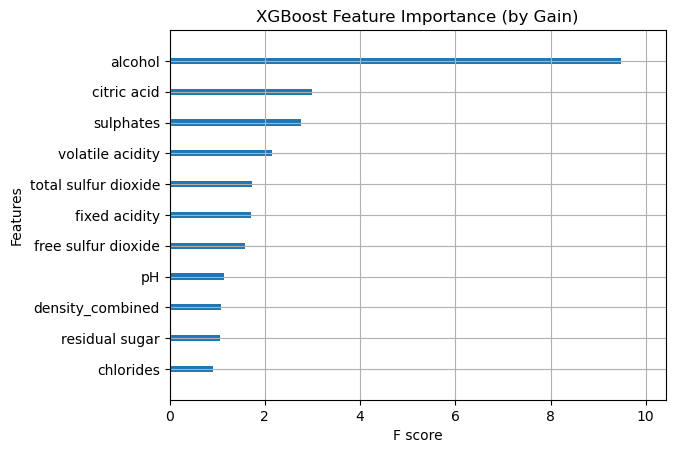

In [11]:
import xgboost as xgb

# Plot built-in feature importance (default = 'weight')
xgb.plot_importance(model, importance_type='gain', show_values=False)
plt.title("XGBoost Feature Importance (by Gain)")
plt.show()

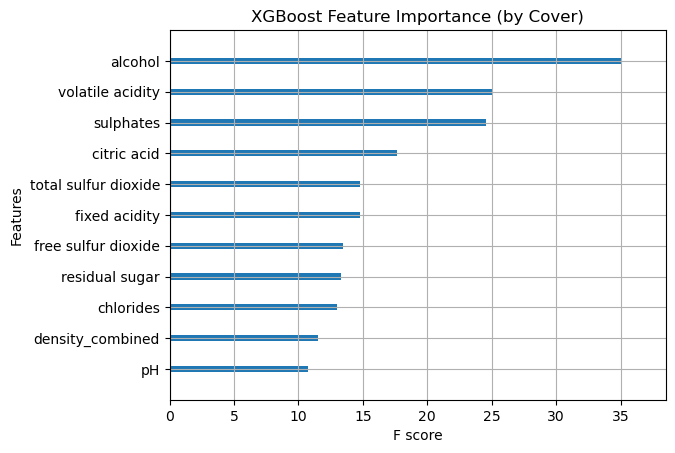

In [22]:
import xgboost as xgb

# Plot built-in feature importance (default = 'weight')
xgb.plot_importance(model, importance_type='cover', show_values=False)
plt.title("XGBoost Feature Importance (by Cover)")
plt.show()

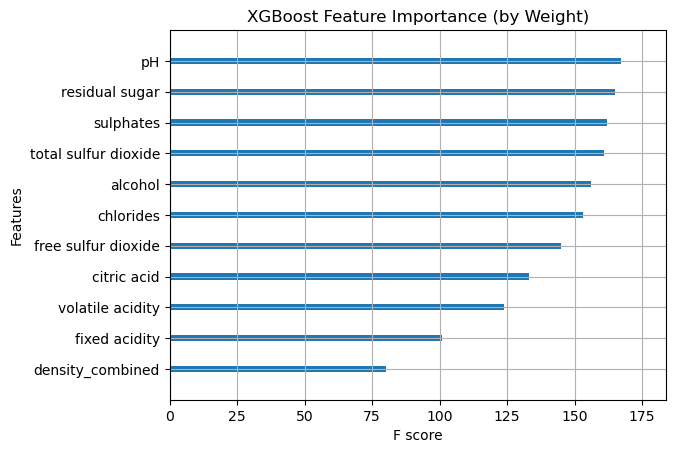

In [23]:
import xgboost as xgb

# Plot built-in feature importance (default = 'weight')
xgb.plot_importance(model, importance_type='weight', show_values=False)
plt.title("XGBoost Feature Importance (by Weight)")
plt.show()

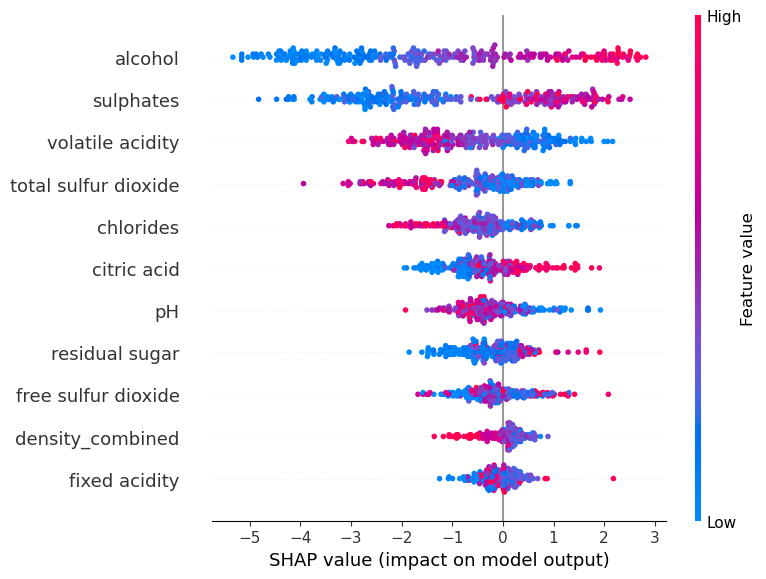

In [12]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Summary plot (global importance)
shap.summary_plot(shap_values, X_test)


In [17]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict probabilities for class 1 (positive class)
y_prob = model.predict_proba(X_test)[:, 1]

# 👇 Set your custom threshold here (e.g., 0.35 instead of default 0.5)
threshold = 0.25
y_pred_custom = (y_prob > threshold).astype(int)

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_custom))

print("\nAUC:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
[[215  31]
 [ 11  29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       246
           1       0.48      0.72      0.58        40

    accuracy                           0.85       286
   macro avg       0.72      0.80      0.75       286
weighted avg       0.89      0.85      0.86       286


AUC: 0.9040650406504065


In [18]:
# Apply threshold
threshold = 0.25
y_pred = (y_prob > threshold).astype(int)

# Convert to DataFrame for inspection
results = pd.DataFrame({
    'true_label': y_test.values,
    'predicted_label': y_pred,
    'probability': y_prob
}, index=y_test.index)

# Add the original features back
results = results.join(X_test)

# Filter: high-quality wines classified as low-quality
false_negatives = results[(results['true_label'] == 1) & (results['predicted_label'] == 0)]

# View or export
# Display all false negatives
false_negatives

# false_negatives.to_csv("false_negatives.csv", index=False)

,true_label,predicted_label,probability,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,density_combined
720,1,0,0.061141,7.7,0.58,0.01,1.8,0.088,12.0,18.0,3.32,0.56,10.5,0.05320
89,1,0,0.010294,8.0,0.59,0.16,1.8,0.065,3.0,16.0,3.42,0.92,10.5,0.25765
724,1,0,0.061141,7.7,0.58,0.01,1.8,0.088,12.0,18.0,3.32,0.56,10.5,0.05320
1067,1,0,0.129209,6.4,0.31,0.09,1.4,0.066,15.0,28.0,3.42,0.70,10.0,-0.58540
639,1,0,0.018714,6.8,0.59,0.06,6.0,0.060,11.0,18.0,3.41,0.59,10.8,-0.70856
12,1,0,0.040446,8.5,0.28,0.56,1.8,0.092,35.0,103.0,3.30,0.75,10.5,0.59840
7,1,0,0.000399,7.3,0.65,0.00,1.2,0.065,15.0,21.0,3.39,0.47,10.0,0.02795
704,1,0,0.175209,6.8,0.36,0.32,1.8,0.067,4.0,8.0,3.36,0.55,12.8,-1.69796
162,1,0,0.002632,5.2,0.48,0.04,1.6,0.054,19.0,106.0,3.54,0.62,12.2,-2.49154
676,1,0,0.004993,6.4,0.57,0.12,2.3,0.120,25.0,36.0,3.47,0.71,11.3,-1.22851


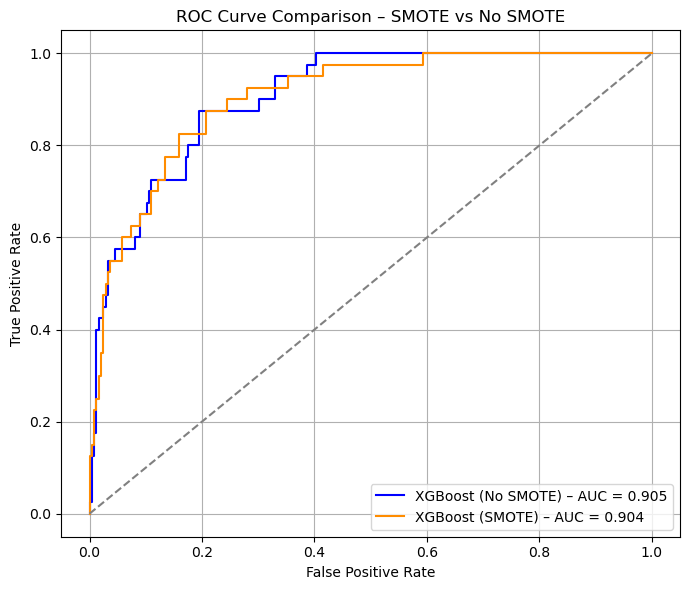

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities
y_prob_no_smote = model1.predict_proba(X_test)[:, 1]
y_prob_smote = model.predict_proba(X_test)[:, 1]

# ROC curve and AUC
fpr_no_smote, tpr_no_smote, _ = roc_curve(y_test, y_prob_no_smote)
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_prob_smote)

auc_no_smote = roc_auc_score(y_test, y_prob_no_smote)
auc_smote = roc_auc_score(y_test, y_prob_smote)

# Plot
plt.figure(figsize=(7, 6))
plt.plot(fpr_no_smote, tpr_no_smote, label=f"XGBoost (No SMOTE) – AUC = {auc_no_smote:.3f}", color="blue")
plt.plot(fpr_smote, tpr_smote, label=f"XGBoost (SMOTE) – AUC = {auc_smote:.3f}", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

# Format
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison – SMOTE vs No SMOTE")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
